# Construct Graph

In [1]:
import dgl
import numpy as np


def build_graph():
    # All 78 edges are stored in two numpy arrays. One for source endpoints
    # while the other for destination endpoints.
    coord = np.array([[0, 1],[1, 2],[1, 3],[2,3],[1, 4],[2,4],[3,4],[4, 5],[5, 6],[5, 7],[6,7], [5, 8],[6,8],[7,8],[8, 9],[9,10],[10,11],
                       [9,11],[9,12],[10,12],[11,12],[12,13],[13,14],[13,16],[14,16],[14,15],[15,16],[13,15],[16,17],[17,18],
                       [2,19],[2,20],[19,20],[20,21],[3,21],[21,22],[3,22],[6,23],[23,24],
                       [6,24],[24,25],[7,25],[25,26],[7,26],[10,27],[10,28],[27,28],[28,29],[11,29],[29,30],[11,30],[14,31],[31,32],[14,32],
                       [15,33],[33,34],[32,33],[15,34]])
    src = coord[:,0]
    dst = coord[:,1]
    # Edges are directional in DGL; Make them bi-directional.
    # u = src
    # v = dst
    u = np.concatenate([src, dst])
    v = np.concatenate([dst, src])
    # Construct a DGLGraph
    # print(u,v)
    return dgl.graph((u, v))


G = build_graph()
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())


We have 35 nodes.
We have 116 edges.


In [12]:
import torch
G.ndata['z'] = torch.ones([35, 2])

In [16]:
G.edges()

(tensor([ 0,  1,  1,  2,  1,  2,  3,  4,  5,  5,  6,  5,  6,  7,  8,  9, 10,  9,
          9, 10, 11, 12, 13, 13, 14, 14, 15, 13, 16, 17,  2,  2, 19, 20,  3, 21,
          3,  6, 23,  6, 24,  7, 25,  7, 10, 10, 27, 28, 11, 29, 11, 14, 31, 14,
         15, 33, 32, 15,  1,  2,  3,  3,  4,  4,  4,  5,  6,  7,  7,  8,  8,  8,
          9, 10, 11, 11, 12, 12, 12, 13, 14, 16, 16, 15, 16, 15, 17, 18, 19, 20,
         20, 21, 21, 22, 22, 23, 24, 24, 25, 25, 26, 26, 27, 28, 28, 29, 29, 30,
         30, 31, 32, 32, 33, 34, 33, 34]),
 tensor([ 1,  2,  3,  3,  4,  4,  4,  5,  6,  7,  7,  8,  8,  8,  9, 10, 11, 11,
         12, 12, 12, 13, 14, 16, 16, 15, 16, 15, 17, 18, 19, 20, 20, 21, 21, 22,
         22, 23, 24, 24, 25, 25, 26, 26, 27, 28, 28, 29, 29, 30, 30, 31, 32, 32,
         33, 34, 33, 34,  0,  1,  1,  2,  1,  2,  3,  4,  5,  5,  6,  5,  6,  7,
          8,  9, 10,  9,  9, 10, 11, 12, 13, 13, 14, 14, 15, 13, 16, 17,  2,  2,
         19, 20,  3, 21,  3,  6, 23,  6, 24,  7, 25,  7, 10, 10, 2

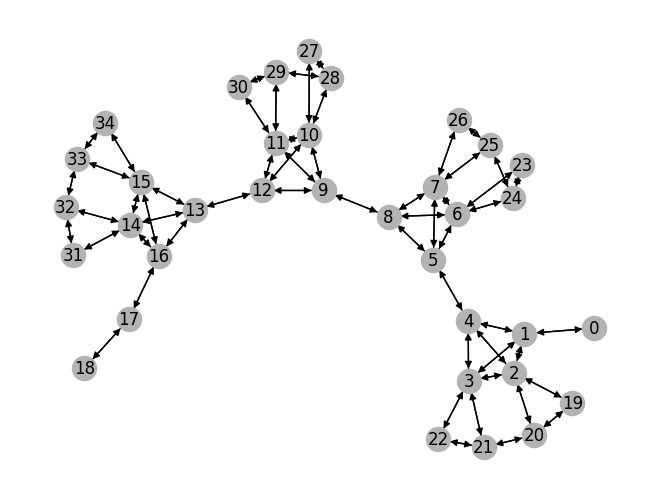

In [5]:
import networkx as nx
%matplotlib inline
# Since the actual graph is undirected, we convert it for visualization
# purpose.
# nx_G = G.to_networkx().to_undirected()
nx_G = G.to_networkx()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])


In [6]:
G.out_degrees(), G.in_degrees(), G.adjacency_matrix(transpose=False, scipy_fmt="csr")

(tensor([1, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 4, 2, 1, 2, 3, 3, 2, 2,
         3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2]),
 tensor([1, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 4, 2, 1, 2, 3, 3, 2, 2,
         3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2]),
 <35x35 sparse matrix of type '<class 'numpy.int64'>'
 	with 116 stored elements in Compressed Sparse Row format>)

# Process Data

In [33]:
import os
import pandas as pd
import numpy as np
# file_dir = "./sensor data"  # file directory
# all_csv_list = os.listdir(file_dir)  # get csv list
# for single_csv in all_csv_list:
#     single_data_frame = pd.read_csv(os.path.join(file_dir, single_csv), sep="\t", index_col="Index")
# #     print(single_data_frame.info())
#     if single_csv == all_csv_list[0]:
#         data = single_data_frame
#     else:  # concatenate all csv to a single dataframe, ingore index
#         data = pd.concat([data, single_data_frame], ignore_index=True)


In [34]:
features = 3
num_nodes = 35
window = 12
file_dir = "./sensor data"  # file directory
all_csv_list = os.listdir(file_dir)  # get csv list
all_csv_list.sort(key=lambda x: int(x.split(".")[0].split("_")[1]))
single_data_frame = pd.read_csv(os.path.join(file_dir, 'sensor_0.csv'), sep="\t", index_col="Index")
N = len(single_data_frame) # 1200
data = np.zeros([N, num_nodes, features])
for (i, single_csv) in enumerate(all_csv_list):
    single_data_frame = pd.read_csv(os.path.join(file_dir, single_csv), sep="\t", index_col="Index")
    data[:,i,:] = single_data_frame[['Left to Right', 'Right to Left', 'Sum']].values

In [35]:
single_data_frame = pd.read_csv(os.path.join(file_dir, 'sensor_34.csv'), sep="\t", index_col="Index")
single_data_frame

,X,Left to Right,X.1,Right to Left,X.2,Sum
Index,,,,,,
0,1899/12/30,0,1899/12/30,0,1899/12/30,0
1,1899/12/30 0:00:30,3,1899/12/30 0:00:30,0,1899/12/30 0:00:30,3
2,1899/12/30 0:01:00,0,1899/12/30 0:01:00,0,1899/12/30 0:01:00,0
3,1899/12/30 0:01:30,0,1899/12/30 0:01:30,0,1899/12/30 0:01:30,0
4,1899/12/30 0:02:00,0,1899/12/30 0:02:00,0,1899/12/30 0:02:00,0
...,...,...,...,...,...,...
1196,1899/12/30 9:58:00,0,1899/12/30 9:58:00,0,1899/12/30 9:58:00,0
1197,1899/12/30 9:58:30,0,1899/12/30 9:58:30,0,1899/12/30 9:58:30,0
1198,1899/12/30 9:59:00,0,1899/12/30 9:59:00,0,1899/12/30 9:59:00,0


In [10]:
data[:,34,:]

array([[0., 0., 0.],
       [3., 0., 3.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [11]:
data.shape

(1201, 35, 3)

In [12]:
# data normalization, Z normalization for train val and test.
# from sklearn.preprocessing import StandardScaler
# for i in range(3):
#     scaler = StandardScaler()
#     train[..., i] = scaler.fit_transform(train[..., i])
#     val[..., i] = scaler.transform(val[..., i])
#     test[..., i] = scaler.transform(test[..., i])

In [36]:
# extract features and label, refer to scripts in dcrnn
# train is the original data without label

x_offsets = np.sort(
        # np.concatenate(([-week_size + 1, -day_size + 1], np.arange(-11, 1, 1)))
        np.concatenate((np.arange(-11, 1, 1),))
    )
    # Predict the next one hour
y_offsets = np.sort(np.arange(1, 13, 1))
min_t = abs(min(x_offsets))
max_t = abs(data.shape[0]- abs(max(y_offsets)))

# max_t = abs(N - abs(max(y_offsets)))  # Exclusive
x, y = [], []
for t in range(min_t, max_t):
    x_t = data[t + x_offsets, ...]
    y_t = data[t + y_offsets, ...]
    x.append(x_t)
    y.append(y_t)

x = np.stack(x, axis=0)
y = np.stack(y, axis=0)


# divide dataset
num_samples, num_nodes = x.shape[0], x.shape[1]
len_train = round(num_samples * 0.7)
len_val = round(num_samples * 0.1)
x_train, y_train = x[: len_train, ...], y[: len_train, ...]
x_val, y_val = x[len_train: len_train + len_val, ...], y[len_train: len_train + len_val, ...]
x_test, y_test = x[len_train + len_val:, ...], y[len_train + len_val:, ...]
for cat in ["train", "val", "test"]:
    _x, _y = locals()["x_" + cat], locals()["y_" + cat]
    np.savez_compressed(
    os.path.join("./dataset", "%s.npz" % cat),
    x=_x,
    y=_y,
    # x_offsets=x_offsets.reshape(list(x_offsets.shape) + [1]),
    # y_offsets=y_offsets.reshape(list(y_offsets.shape) + [1]),
)

In [44]:
num_samples - (len_train + len_val)

235

# Load Data

In [14]:
data_list = {}
for cat in ["train", "val", "test"]:
    data_list[cat] = np.load(os.path.join("./dataset", "%s.npz" % cat))
data_list["train"]["x"]

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  8.,  8.],
         [ 0.,  3.,  3.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  8.,  8.],
         [ 0., 16., 16.],
         [ 3.,  0.,  3.]],

        [[ 1., 15., 16.],
         [ 2., 13., 15.],
         [ 3.,  0.,  3.],
         ...,
         [ 2.,  0.,  2.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        ...,

        [[13., 35., 48.],
         [ 6., 41., 47.],
         [11.,  1., 12.],
         ...,
         [ 4.,  9., 13.],
         [ 4.,  4.,  8.],
         [ 3.,  0.,  3.]],

        [[ 5., 10., 15.],
         [ 3., 23., 26.],
         [13.,  0., 13.],
         ...,
         [ 3.,  0.,  3.],
         [ 0.,  2.,  2.],
         [ 0.,  0.,  0.]],

        [[15., 20., 35.],
         [18., 12., 30.],
         [16.,  0., 16.],
         ...,
         [ 3.,  0.,  3.],
        

In [15]:
data_list["train"]["x"].shape
# data['x_train'][..., 0].mean()

(825, 12, 35, 3)

In [16]:
data_list["test"]["x"].shape

(235, 12, 35, 3)

In [17]:
data_list["test"]["x"].shape, data_list["val"]["x"].shape

((235, 12, 35, 3), (118, 12, 35, 3))

In [18]:
118+235+825 + 12 + 12 - 1

1201

In [19]:
# validate
data[:,0,:] == x_train[0,:,0,:]

<ipython-input-19-5cf8040f2755>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  data[:,0,:] == x_train[0,:,0,:]


False

# Model

In [45]:
import numpy as np
import os
import torch
import torch.nn as nn
import utils
import random
# from sklearn.preprocessing import StandardScaler
from utils import load_dataset#, load_dataset_rnn
import dgl
from DCRNN import DCRNNModel
from utils import StandardScaler
import math

In [4]:
def build_graph():
    # data
    coord = np.array(
        [[0, 1], [1, 2], [1, 3], [2, 3], [1, 4], [2, 4], [3, 4], [4, 5], [5, 6], [5, 7], [6, 7], [5, 8], [6, 8], [7, 8],
         [8, 9], [9, 10], [10, 11],
         [9, 11], [9, 12], [10, 12], [11, 12], [12, 13], [13, 14], [13, 16], [14, 16], [14, 15], [15, 16], [13, 15],
         [16, 17], [17, 18],
         [2, 19], [2, 20], [19, 20], [20, 21], [3, 21], [21, 22], [3, 22], [6, 23], [23, 24],
         [6, 24], [24, 25], [7, 25], [25, 26], [7, 26], [10, 27], [10, 28], [27, 28], [28, 29], [11, 29], [29, 30],
         [11, 30], [14, 31], [31, 32], [14, 32],
         [15, 33], [33, 34], [32, 33], [15, 34]])
    src = coord[:, 0]
    dst = coord[:, 1]

    u = np.concatenate([src, dst])
    v = np.concatenate([dst, src])
    # Construct a DGLGraph
    # print(u,v)
    return dgl.graph((u, v))

G = build_graph()
adj_mat = G.adjacency_matrix(transpose=False, scipy_fmt="csr")
adj = G.adjacency_matrix(transpose=False, scipy_fmt="coo")

In [5]:
import torch
import numpy as np
training_iter_time = 0
total_train_time = 0
# G = build_graph()
# adj_mat = G.adjacency_matrix(transpose=False, scipy_fmt="csr")
batch_size = 64
enc_input_dim = 3  # encoder network input size, can be 1 or 3
dec_input_dim = 3  # decoder input
max_diffusion_step = 2
num_nodes = 35
num_rnn_layers = 2
rnn_units = 64
seq_len = 12
output_dim = 3
device = "cpu"
filter_type = "dual_random_walk"
max_grad_norm = 5
cl_decay_steps = 2000

In [6]:
model = DCRNNModel(adj_mat, batch_size, enc_input_dim, dec_input_dim, max_diffusion_step, num_nodes,
                       num_rnn_layers, rnn_units, seq_len, output_dim, filter_type)
# model.load_state_dict(torch.load("./result/dcrnn1.pt"))
model.load_state_dict(torch.load("./result/dcrnn.pt"))


<All keys matched successfully>

In [28]:
from RNN import Seq2seq
from GAT import GAT
model_rnn = Seq2seq(enc_input_dim, dec_input_dim, num_rnn_layers, rnn_units, seq_len, output_dim)
model_rnn.load_state_dict(torch.load("./result/rnn.pt"))


<All keys matched successfully>

In [29]:
model_GAT = GAT(adj, seq_len, enc_input_dim, rnn_units, output_dim, num_nodes, batch_size, num_heads=5)
model_GAT.load_state_dict(torch.load("./result/gat.pt"))

RuntimeError: Error(s) in loading state_dict for GAT:
	Unexpected key(s) in state_dict: "layer1.heads.5.W", "layer1.heads.5.atten_W", "layer1.heads.6.W", "layer1.heads.6.atten_W", "layer1.heads.7.W", "layer1.heads.7.atten_W". 
	size mismatch for layer2.heads.0.W: copying a param with shape torch.Size([512, 3]) from checkpoint, the shape in current model is torch.Size([320, 3]).

In [9]:
data = load_dataset("./dataset", batch_size=64, test_batch_size=64)
test_dataloader = data["test_loader"]
train_dataloader = data["train_loader"]

In [10]:
for i, (x, y) in enumerate(test_dataloader.get_iterator()):
    y = y
    x = torch.FloatTensor(x)
    if i == 2:
        break

In [68]:
for f in (test_dataloader.get_iterator()):
    print(f[0][0][0][0])

[-0.03213277  1.26705775  0.56380938]
[-0.26177169  0.25357936 -0.11289722]
[-0.03213277  1.26705775  0.56380938]
[-0.10867908  0.61553592  0.19162075]


In [63]:
test_dataloader.size

256

In [48]:
#for dcrnn
pred = model(x, torch.zeros([batch_size, 12, num_nodes, enc_input_dim]), 0)
pred = torch.transpose(pred.view(12, model.batch_size, model.num_nodes,
                                                 model.output_dim), 0, 1)  # back to (50, 12, 207, 1)

In [ ]:
pred = model(torch.unsqueeze(x[0,...],dim=0), torch.zeros([1, 12, num_nodes, enc_input_dim]), 0)

In [48]:
#for rnn
x = x.permute(0, 2, 1, 3).reshape(-1, 12, 3)
pred = model_rnn(x, torch.zeros([num_nodes*batch_size, 12, 3]), teacher_forcing_ratio=0)

In [11]:
#inverse transform
# org_data = np.load(os.path.join('./dataset', 'train' + '.npz'))
transform_data_x, transform_data_y = [], []
pred_list = []
scalers = []
for i in range(3):
    # if i != 2:
    #     scaler = StandardScaler(mean=data['x_train'][..., i].mean(), std=data['x_train'][..., i].std())
    #     scalers.append(scaler)
    # else:
    #     scaler = StandardScaler(mean=(scalers[0].mean + scalers[1].mean),
    #                                 std=np.sqrt(scalers[0].std**2+scalers[1].std**2))
    #     scalers.append(scaler)
    transform_data_x.append(data['scalers'][i].inverse_transform(x[..., i]))  #(64, 12, 35, 3)
    # pred_list.append(data['scalers'][i].inverse_transform(pred.detach()[..., i]))
    transform_data_y.append(data['scalers'][i].inverse_transform(y[..., i]))

transform_data_x = np.stack(transform_data_x, axis = 3)
transform_data_y = np.stack(transform_data_y, axis = 3)
# pred = np.stack(pred_list, axis = 3)
# scalers.clear()


In [12]:
x.shape

torch.Size([64, 12, 35, 3])

In [18]:
transform_data_y.shape

(64, 12, 35, 3)

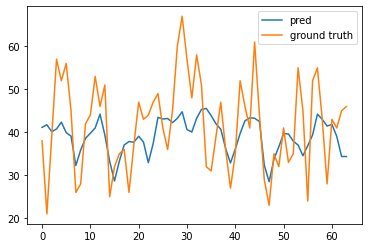

In [13]:
import matplotlib.pyplot as plt
node = 0 #after 3 min
step = 0
# vis = np.reshape(y_hat, [-1, 35, 3])
model_rnn.eval()
x_rnn = x[:, :, node, :]
pred = model_rnn(x_rnn, torch.zeros([batch_size, 12, 3]), teacher_forcing_ratio=0) #bc seq feature
pred = data['scalers'][2].inverse_transform(pred.detach()[..., 2])
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
vis = pred[:, step]  # bc, steps, nodes, features
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, vis, label='pred')
plt.plot(x_aixs, gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

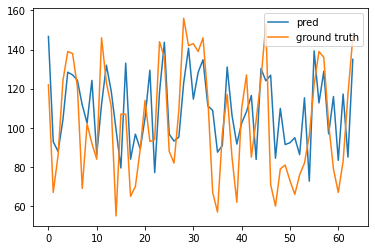

In [23]:
import matplotlib.pyplot as plt
node = 18
step = 0 #after 3 min
# vis = np.reshape(y_hat, [-1, 35, 3])
model.eval()
pred = model(x, torch.zeros([batch_size, 12, num_nodes, enc_input_dim]), teacher_forcing_ratio=0)
pred = torch.transpose(pred.view(12, model.batch_size, model.num_nodes,
                                                 model.output_dim), 0, 1)
pred = data['scalers'][2].inverse_transform(pred.detach()[..., 2]) # 2 for dim 2
vis = pred[:, step, :]  # bc, steps, nodes, features
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, vis[:, node], label='pred')
plt.plot(x_aixs, gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

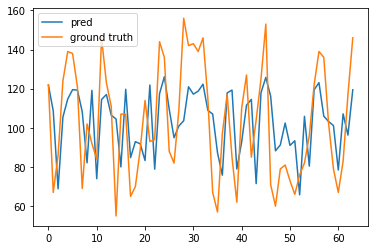

In [24]:
import matplotlib.pyplot as plt
node = 18 #after 3 min
step = 0
# vis = np.reshape(y_hat, [-1, 35, 3])
model_rnn.eval()
x_rnn = x[:, :, node, :]
pred = model_rnn(x_rnn, torch.zeros([batch_size, 12, 3]), teacher_forcing_ratio=0) #bc seq feature
pred = data['scalers'][2].inverse_transform(pred.detach()[..., 2])
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
vis = pred[:, step]  # bc, steps, nodes, features
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, vis, label='pred')
plt.plot(x_aixs, gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

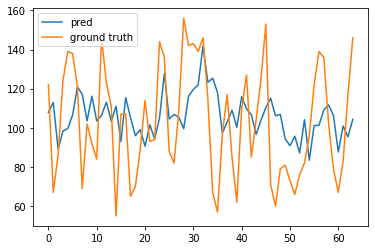

In [25]:
import matplotlib.pyplot as plt
node = 18 #after 3 min
step = 0
# vis = np.reshape(y_hat, [-1, 35, 3])
model_GAT.eval()
# x_rnn = x[:, :, node, :]
pred = model_GAT(x.permute(0, 2, 1, 3).reshape([batch_size, num_nodes, -1])) #bc seq feature
# pred = torch.transpose(pred.view(1, batch_size, num_nodes,
#                                                  output_dim), 0, 1)
# pred = pred.transpose(0, 1)
pred = data['scalers'][2].inverse_transform(pred.detach()[..., 2])
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
vis = pred[:, step, node]  # bc, steps, nodes, features
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, vis, label='pred')
plt.plot(x_aixs, gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

In [26]:
# pred = model(x.permute(0, 2, 1, 3).reshape([batch_size, num_nodes, -1])) #bc seq feature
# pred = model(x, torch.zeros([batch_size, 12, num_nodes, enc_input_dim]), teacher_forcing_ratio=0)
pred = model_rnn(x_rnn, torch.zeros([batch_size, 12, 3]), teacher_forcing_ratio=0) #bc seq feature
# pred = torch.transpose(pred.view(1, batch_size, num_nodes,
#                                                  output_dim), 0, 1)
pred.size()

torch.Size([64, 12, 3])

In [52]:
data['scalers'][2].inverse_transform(pred.detach()[..., 2]).shape

torch.Size([64, 1, 35])

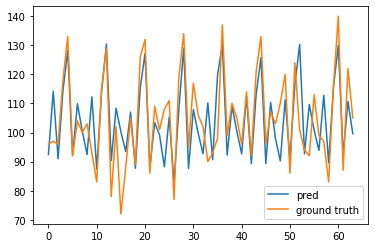

In [52]:
import matplotlib.pyplot as plt
node = 15
step = 11 #after 3 min
# vis = np.reshape(y_hat, [-1, 35, 3])
vis = pred[:, step, :, :]  # bc, steps, nodes, features
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, vis[:, node, 2], label='pred')
plt.plot(x_aixs, gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

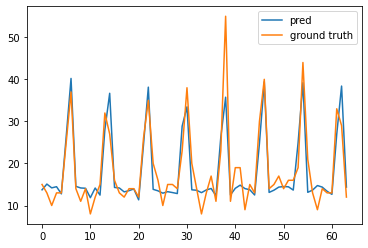

In [53]:
import matplotlib.pyplot as plt
node = 10
step = 11  # after 30s
# vis = np.reshape(y_hat, [-1, 35, 3])
vis = pred[:, step, :, :]  # bc, steps, nodes, features
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, vis[:, node, 2], label='pred')
plt.plot(x_aixs, gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

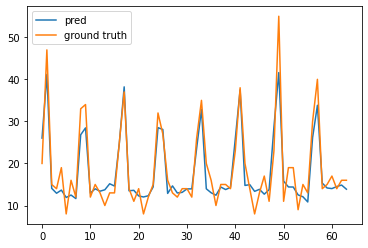

In [54]:
import matplotlib.pyplot as plt
node = 10
step = 0  # after 30s
# vis = np.reshape(y_hat, [-1, 35, 3])
vis = pred[:, step, :, :]  # bc, steps, nodes, features
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, vis[:, node, 2], label='pred')
plt.plot(x_aixs, gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

In [ ]:
node = 10
step = 0  # after 30s
# vis = np.reshape(y_hat, [-1, 35, 3])
vis = pred[:, step, :, :]  # bc, steps, nodes, features
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, vis[:, node, 2], label='pred')
plt.plot(x_aixs, gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

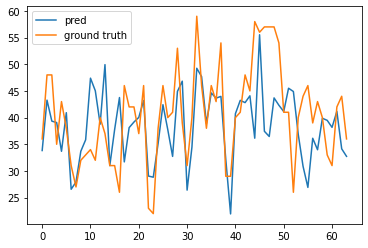

In [55]:
import matplotlib.pyplot as plt
node = 0
step = 0 #after 6 min
# vis = np.reshape(y_hat, [-1, 35, 3])
vis = pred[:, step, :, :]  # bc, steps, nodes, features
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, vis[:, node, 2], label='pred')
plt.plot(x_aixs, gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

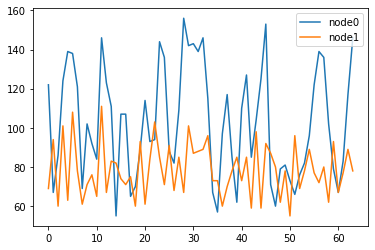

In [77]:
node = 18
node2 = 9
step = 0 #after 6 min
# vis = np.reshape(y_hat, [-1, 35, 3])
# gt2 = pred[:, step, :, :]  # bc, steps, nodes, features
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
gt = transform_data_y[:, step, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(x_aixs, gt[:, node, 2], label='node0')
plt.plot(x_aixs, gt[:, node2, 2], label='node1')
plt.legend()
plt.show()

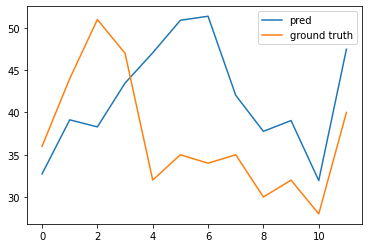

In [57]:

node = 0
ent =  63
# step = 0 #after 6 min
# vis = np.reshape(y_hat, [-1, 35, 3])
vis = pred[ent, :, :, :]  # bc, steps, nodes, features
# gt = np.reshape(transform_data_y[:, 0, :, :], [-1, 35, 3])
gt = transform_data_y[ent, :, :, :]
x_aixs = np.arange(vis.shape[0])
plt.plot(np.arange(12), vis[:, node, 2], label='pred')
plt.plot(np.arange(12), gt[:, node, 2], label='ground truth')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
d = pd.read_csv('raw_data/sensor front.csv', sep="\t", index_col="Index")
d2 = pd.read_csv('raw_data/sensor mid.csv', sep="\t", index_col="Index")
d_sum = d["Sum"]
d2_sum = d2["Sum"]

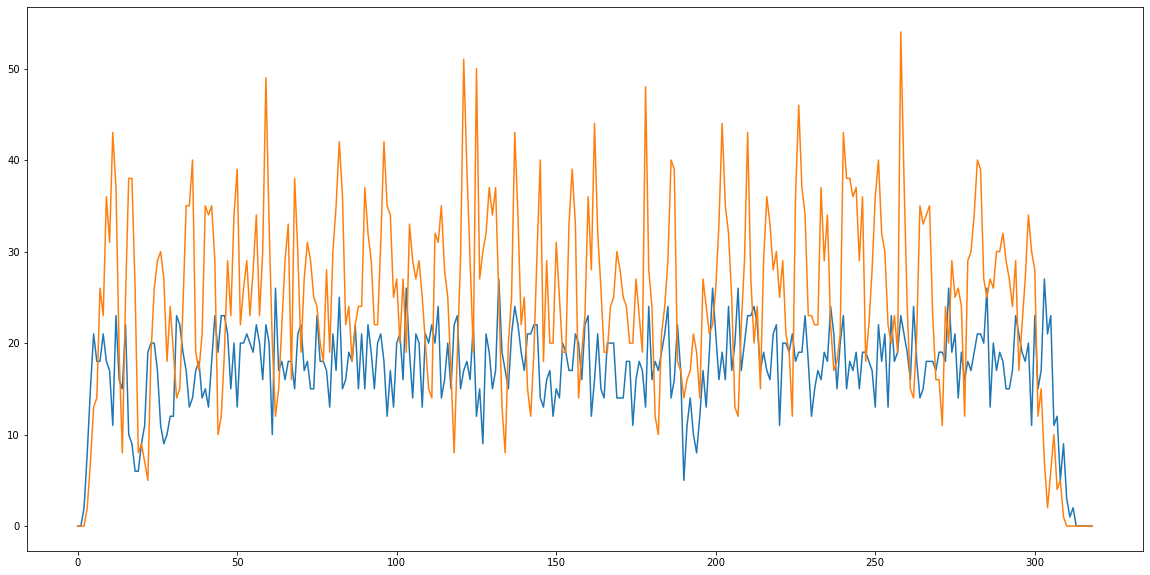

In [26]:
x = np.arange(len(d_sum))
plt.figure(figsize=(20,10))
plt.plot(x, d_sum)
plt.plot(x, d2_sum)

plt.show()

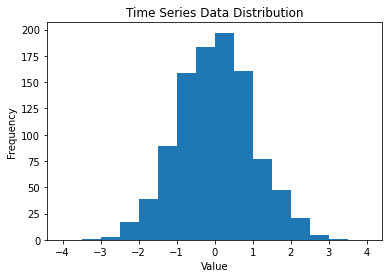

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random values for the time series data
# values = np.random.normal(loc=0, scale=1, size=1000)
values = np.random.normal(loc=0, scale=1, size=1000)

# Define the edges of the bins to use for the histogram
bin_edges = np.arange(-4, 4.5, 0.5)

# Plot the histogram with the predefined x-axis values
plt.hist(values, bins=bin_edges)
plt.title('Time Series Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


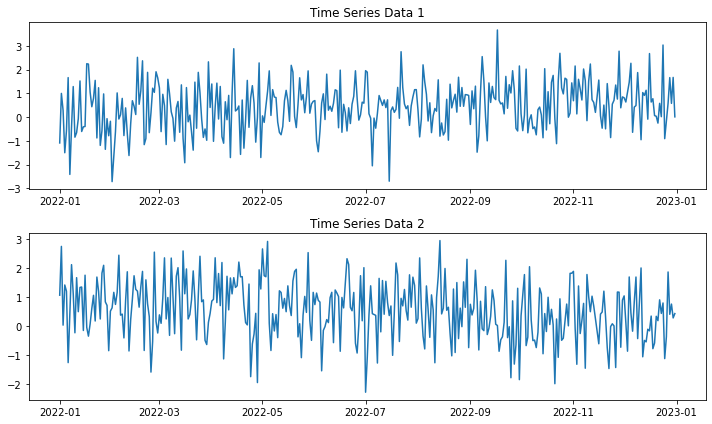

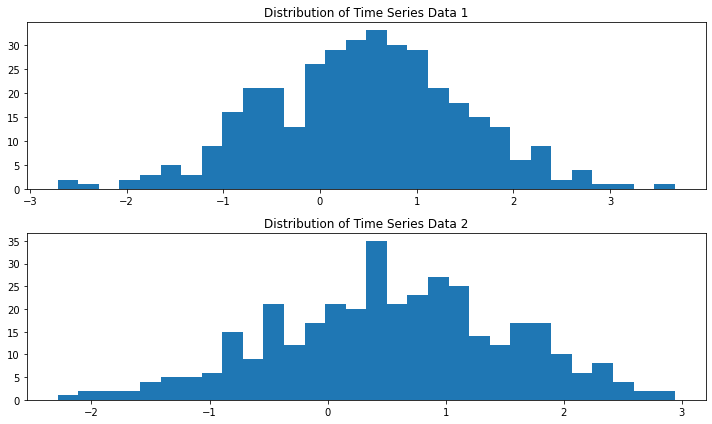

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(123)

# Generate a time index for the data
start_date = '2022-01-01'
end_date = '2022-12-31'
index = pd.date_range(start_date, end_date, freq='D')

# Generate random values for the time series data
values_1 = np.random.normal(loc=0, scale=1, size=len(index))
values_2 = np.random.normal(loc=0, scale=1, size=len(index))

# Add different trends to the time series data
trend_1 = np.linspace(0, 1, len(index))
trend_2 = np.linspace(1, 0, len(index))

values_1 += trend_1
values_2 += trend_2

# Create a DataFrame with the time index and values
data_1 = pd.DataFrame({'value': values_1}, index=index)
data_2 = pd.DataFrame({'value': values_2}, index=index)

# Plot the time series data
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(data_1)
axs[0].set_title('Time Series Data 1')

axs[1].plot(data_2)
axs[1].set_title('Time Series Data 2')

plt.tight_layout()
plt.show()

# Plot the distribution of the time series data
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].hist(data_1['value'], bins=30)
axs[0].set_title('Distribution of Time Series Data 1')

axs[1].hist(data_2['value'], bins=30)
axs[1].set_title('Distribution of Time Series Data 2')

plt.tight_layout()
plt.show()


2063.0


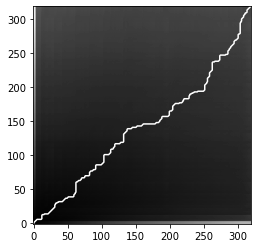

In [3]:

import numpy as np

# We define two sequences x, y as numpy array
# where y is actually a sub-sequence from x
# x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
# y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
x = d_sum
y = d2_sum

from dtw import dtw

manhattan_distance = lambda x, y: np.abs(x - y)

d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=manhattan_distance)

print(d)


# You can also visualise the accumulated cost and the shortest path
import matplotlib.pyplot as plt

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from lib.utils import load_dataset, sliding_win#, load_dataset_rnn
node = 20
data = load_dataset("./dataset", batch_size=64, test_batch_size=64)
model = LinearRegression()
model.fit(data["x_train"][:,:,node,:].reshape([-1, 12*3]), data["y_train"][:,:,node,:].reshape([-1, 12*3]))

In [ ]:
output = model.predict(source[:,:,node,:].reshape([-1, 12*3]))
output = output.reshape([source.shape[0], 12, 3])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(output.shape[0])
y = output[:, 11, 2]
yy = target[:,:,node,:][:, 11, 2]
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.plot(x, yy)

plt.show()

In [ ]:
# debug v1 code
model = LinearRegression()
steps=400
model.fit(data["x_train"][:steps,:,node,:].reshape([-1, 12*3]), data["y_train"][:steps,:,node,:].reshape([-1, 12*3]))
output = model.predict(data["x_test"][:steps,:,node,:].reshape([-1, 12*3]))
output = output.reshape([data["x_test"][:steps,:,node,:].shape[0], 12, 3])
x = np.arange(output.shape[0])
y = output[:, 11, 2]
yy = data["y_test"][:steps,:,node,:][:, 11, 2]
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.plot(x, yy)

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 生成一个随机时间序列
np.random.seed(42)
ts = np.array(df_dict['./sc sensor/sc9']["sensor_1"].values.tolist())[:, 2]

# 计算ACF
lags = 50  # 设置最大滞后阶数
acf, confint = sm.tsa.acf(ts, nlags=lags, alpha=0.05)

# 绘制ACF
fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(np.arange(lags+1), acf, use_line_collection=True)
ax.set_xlabel('Lag')
ax.set_ylabel('ACF')
ax.set_xlim(0, lags)
ax.grid(True)

plt.show()

NameError: name 'df_dict' is not defined

## processing csv file, delete redundunt rows

In [ ]:
import os
import pandas as pd
dir_path = "./sc sensor/sc5_2/"
file_names = os.listdir(dir_path)

# 指定行数
target_row_num = 361

# 循环读取每个文件，并进行处理
for file_name in file_names:
    if file_name.endswith('.csv'):
        file_path = os.path.join(dir_path, file_name)

        # 读取文件
        df = pd.read_csv(file_path)

        # 检查行数是否相等
        if len(df.index) != target_row_num:
            print(df.index)
            # 如果不相等，删除多余的行
            df = df.iloc[:target_row_num, :]

            # 保存处理后的文件
            df.to_csv(file_path, index=False)

            print(f"{file_name} has been processed and saved.")
        else:
            print(f"{file_name} has the correct number of rows and has not been modified.")

In [ ]:
plt.show()

In [ ]:
Z_hat = []
mdl = 5
for pred in vis_list:
    Z_hat.append(np.sum(pred, axis=1)[:, :, feat]) # only fix feature
Z = np.sum(z, axis=1)[:, :, feat] # the node and feat is not summed, Z: [N, nodes, features]; preds: [N, nodes, features]
L = quantile_loss(Z, Z_hat[mdl], rho=0.9)
# Create a color map
cmap = plt.cm.get_cmap('hot')
fig, ax = plt.subplots(figsize=(10, 8))
# Plot the heat map
im = ax.imshow(L.T, cmap=cmap, aspect='auto')
# im = ax.imshow(np.mean(Z[:, :, :, 2].T, axis=1), cmap=cmap, aspect='auto')
ax.grid(False)
ax.set_yticks(np.arange(len(pos)))
ax.set_yticklabels(pos+1)
# Add a color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

In [ ]:
#debug
import numpy as np
def quantile_loss0(Z, Z_hat, rho):
    Z_hat_rho = np.quantile(Z_hat, rho) # Z_rho scalar, Z vector
    # Z_hat_rho = np.mean(Z) # Z_rho scalar, Z vector
    error = Z_hat - Z
    L = np.abs(error) * ((rho * (np.sign(Z - Z_hat_rho)+1) + (1-rho) * (np.sign(Z_hat_rho - Z)+1))) #use this one, np.sign + 1 in [2, 0], so not need*2
    # L = (Z_hat - Z) * (rho * (np.sign(Z - Z_hat_rho)+1) - (1-rho) * (np.sign(Z_hat_rho - Z)+1))
    return L.mean() # vector: point-wise loss

def quantile_loss1(true_values, predicted_values, quantile):
    errors = true_values - predicted_values
    loss = np.maximum(quantile * errors, (quantile - 1) * errors)
    return loss.mean()

def mae_loss(true_values, predicted_values):
    errors = np.abs(true_values - predicted_values)
    loss = errors.mean()
    return loss
# Example usage
# true_values = np.array([0,0,0,0,0])
# predicted_values = np.array([1,2,3,4,5])
np.random.seed(1)
true_values = np.random.randn(1000)
# predicted_values = np.random.randn(1000)
predicted_values = np.mean(true_values) - 5
quantile = 0.5
loss = quantile_loss1(true_values, predicted_values, quantile)
loss11 = quantile_loss0(true_values, predicted_values, quantile)
loss1 = mae_loss(true_values, predicted_values)
print("Quantile Loss:", loss)
print("my qt Loss:", loss11)
print("mae Loss:", loss1), np.quantile(predicted_values, rho)

In [ ]:
# rmse loss
L_list = []
for n, z_hat in enumerate(Z_hat):
    L = se_loss(Z, z_hat)
    x = np.arange(Z.shape[0])
    L_list.append(np.sqrt(L.mean()))  # rmse

    plt.plot(x, np.sum(L, axis=(1,2)))
plt.legend()
plt.show()
sorted_id = sorted(range(len(L_list)), key=lambda k: L_list[k], reverse=False)
# L_list/np.sum(Z), sorted_id
L_list, [model_names[id] for id in sorted_id]

In [ ]:
# ae loss
L_list = []
for n, z_hat in enumerate(Z_hat):
    L = ae_loss(Z, z_hat)
    x = np.arange(Z.shape[0])
    L_list.append(L.mean()) #mae

    plt.plot(x, np.sum(L, axis=(1,2)))
plt.legend()
plt.show()
sorted_id = sorted(range(len(L_list)), key=lambda k: L_list[k], reverse=False)
# L_list/np.sum(Z), sorted_id
L_list, [model_names[id] for id in sorted_id]

generate data for VAR

In [ ]:
# not in used for now
import json
def process_data_var(df_dict: dict, num_sensors: int):
    '''
    process data for VAR, number of features --> 105
    '''
    temp_dict = df_dict.copy()
    L = num_sensors
    for key in df_dict.keys():
        for s in range(L):
            temp_dict[key] = temp_dict[key].join(df_dict[key]["sensor_"+ str(s+1)].apply(lambda x: pd.Series(x)).add_prefix(f'sensor_{s+1}_'))

        temp_dict[key] = temp_dict[key].drop(df_dict[key].columns, axis=1)
    return temp_dict
# open a file for writing
var_df_dict = process_data_var(df_dict, num_sensors=35)
for key in df_dict:
    var_df_dict[key] = var_df_dict[key].to_json()
with open('./dataset/df_dict.json', 'w') as f:
    # convert the dictionary to a JSON string and write it to the file
    json.dump(var_df_dict, f)